# Nutrition Facts for Starbucks Menu

## Business Understanding

The data explored in this notebook was obtained from the "Nutrition facts for Starbucks Menu" Kaggle site. The data contains information about the Starbucks Drinks Menu with ingredients.

It will be explored implementing the Cross-Industry Standard Process for Data Mining (CRISP-DM) process as part of the Write a Data Science Blog Post project requirements for Udacity's Data Scientist Nanodegree. 

In this project, I try to focus on answering below questions 

- _Is there any relationship between Calories and beverage preparation type?_
- _Are the average amount of Fat related with Starbucks Drink Category?_
- _Difference In Calories between Classic Espresso Drinks and Signature Espresso Drinks?_
- _Which beverages should not be drunk under specific circumstances such as high calories, sugar and caffeine level?_

## Libraries

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#pip install plotly==4.14.3
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Data Preparation

In this step, I will perform the below operations to check what the data set comprises of. I will check the below things:

- head of the dataset
- the shape of the dataset
- info of the dataset
- summary of the dataset

The head function will tell you the top records in the data set. By default, python shows you only the top 5 records.However, I want to show top 2.

In [2]:
df = pd.read_csv('starbucks_drinkMenu_expanded.csv')
df.head(2)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260


The shape attribute tells us a number of observations and variables I have in the data set. 
It is used to check the dimension of data. This dataset has 242 observations and 18 variables in the data set.

In [3]:
df.shape

(242, 18)

The funciton of info() is used to check the Information about the data and the datatypes of each respective attribute.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

The described method will help to see how data has been spread for numerical values. 
I can clearly see the minimum value, mean values, different percentile values, and maximum values.

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Calories,242.0,193.871901,102.863303,0.0,120.0,185.0,260.00,510.0
Trans Fat (g),242.0,1.307025,1.640259,0.0,0.1,0.5,2.00,9.0
Saturated Fat (g),242.0,0.037603,0.071377,0.0,0.0,0.0,0.10,0.3
Sodium (mg),242.0,6.363636,8.630257,0.0,0.0,5.0,10.00,40.0
Total Carbohydrates (g),242.0,128.884298,82.303223,0.0,70.0,125.0,170.00,340.0
Cholesterol (mg),242.0,35.991736,20.795186,0.0,21.0,34.0,50.75,90.0
Dietary Fibre (g),242.0,0.805785,1.445944,0.0,0.0,0.0,1.00,8.0
Sugars (g),242.0,32.962810,19.730199,0.0,18.0,32.0,43.75,84.0
Protein (g),242.0,6.978512,4.871659,0.0,3.0,6.0,10.00,20.0


In [6]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

## Data Manipulation

In [7]:
df.columns=df.columns.str.replace(")","")
df.columns=df.columns.str.replace(" ","")
df.columns=df.columns.str.replace("(","_")
df.columns=df.columns.str.lower()
df.columns

Index(['beverage_category', 'beverage', 'beverage_prep', 'calories',
       'totalfat_g', 'transfat_g', 'saturatedfat_g', 'sodium_mg',
       'totalcarbohydrates_g', 'cholesterol_mg', 'dietaryfibre_g', 'sugars_g',
       'protein_g', 'vitamina_%dv', 'vitaminc_%dv', 'calcium_%dv', 'iron_%dv',
       'caffeine_mg'],
      dtype='object')

In [8]:
cols_to_keep=["beverage_category", "beverage","beverage_prep","calories","totalfat_g","totalcarbohydrates_g",
               "protein_g"]
starbucks_data=df[cols_to_keep]
starbucks_data=starbucks_data.rename(columns={"totalfat_g":"fat_g",
                                                "totalcarbohydrates_g":"carbohydrates_g",
                                              "protein_g":"proteins_g",
                                              "beverage":"product_name"
                                               })
starbucks_data.head()

,beverage_category,product_name,beverage_prep,calories,fat_g,carbohydrates_g,proteins_g
0,Coffee,Brewed Coffee,Short,3,0.1,5,0.3
1,Coffee,Brewed Coffee,Tall,4,0.1,10,0.5
2,Coffee,Brewed Coffee,Grande,5,0.1,10,1.0
3,Coffee,Brewed Coffee,Venti,5,0.1,10,1.0
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,75,6.0


In [9]:
starbucks_data.carbohydrates_g=starbucks_data.carbohydrates_g.astype(float)
starbucks_data.fat_g.unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [10]:
starbucks_data_mistake=starbucks_data.fat_g.loc[starbucks_data.fat_g=="3 2"]
starbucks_data.fat_g=starbucks_data.fat_g.replace(starbucks_data_mistake,np.nan)
starbucks_data.fat_g=starbucks_data.fat_g.astype(float)

In [11]:
starbucks_data.dtypes

beverage_category     object
product_name          object
beverage_prep         object
calories               int64
fat_g                float64
carbohydrates_g      float64
proteins_g           float64
dtype: object

## Handling with Missing Data

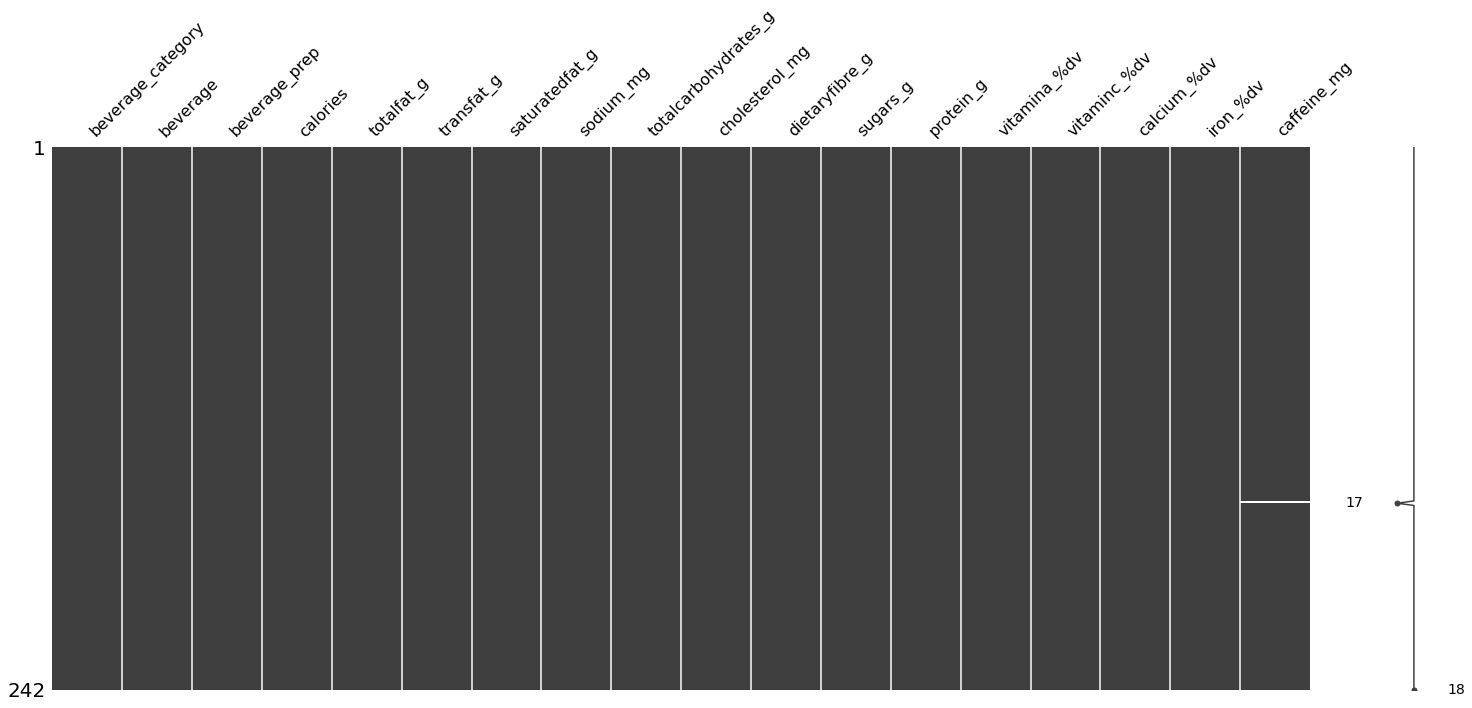

In [12]:
#pip install missingno
import missingno as msno
msno.matrix(df)

In [13]:
#check for the null values in each column
df.isnull().sum()

beverage_category       0
beverage                0
beverage_prep           0
calories                0
totalfat_g              0
transfat_g              0
saturatedfat_g          0
sodium_mg               0
totalcarbohydrates_g    0
cholesterol_mg          0
dietaryfibre_g          0
sugars_g                0
protein_g               0
vitamina_%dv            0
vitaminc_%dv            0
calcium_%dv             0
iron_%dv                0
caffeine_mg             1
dtype: int64

In [14]:
starbucks_data.isnull().sum()

beverage_category    0
product_name         0
beverage_prep        0
calories             0
fat_g                1
carbohydrates_g      0
proteins_g           0
dtype: int64

In [15]:
#pip install pandas-profiling[notebook]
from pandas_profiling import ProfileReport
profile = ProfileReport(starbucks_data, title="Starbucks Profiling Report")
profile

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Profiling Report also gives the sumamary of data statistics. It is very useful library to learn how the data is spread.

## Exploratory Data Analaysis 

**- Is there any relationship between Calories and Beverage Preparation Type?**

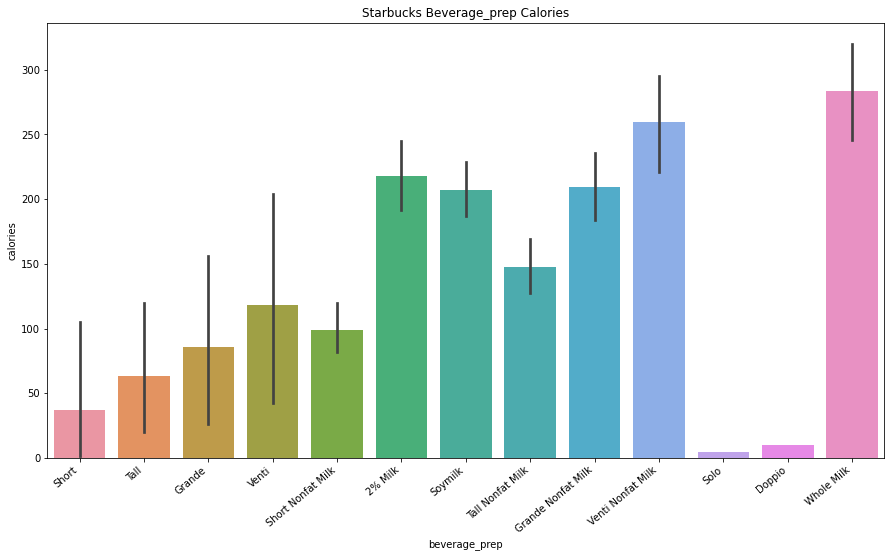

In [16]:
# data visualization to see the which Starbucks drink has the highest Caffeine
plt.figure(figsize=(15, 8))
sns.barplot(x="beverage_prep", y="calories", data=starbucks_data)
plt.xticks(rotation=40, ha='right')
plt.title("Starbucks Beverage_prep Calories")
plt.show()

To understand this, we constructed a barplot with Calories and Beverage Preparation Type.
The median of the Beverages prepared with Whole Milk is the highest whereas Solo and Short are the lowest. It means Whole Milk Drinks has more Calories in average.

**- Are the average amount of Total Fat related with Starbucks Drink Category?**

In [17]:
by_category = pd.DataFrame({'beverage_category':starbucks_data['beverage_category'].value_counts().index.tolist(),
                            'Count':starbucks_data['beverage_category'].value_counts().tolist(),
                            'fat_g (Sum)':starbucks_data[['beverage_category','fat_g']].groupby('beverage_category').sum()['fat_g'],
                            'fat_g (Mean)':starbucks_data[['beverage_category','fat_g']].groupby('beverage_category').mean()['fat_g']})
by_category.reset_index(drop = True)

,beverage_category,Count,fat_g (Sum),fat_g (Mean)
0,Classic Espresso Drinks,58,181.4,3.127586
1,Tazo® Tea Drinks,52,0.4,0.100000
2,Signature Espresso Drinks,40,108.1,3.002778
3,Frappuccino® Blended Coffee,36,22.2,1.850000
4,Shaken Iced Beverages,18,15.1,1.258333
5,Frappuccino® Blended Crème,13,8.5,0.472222
6,Frappuccino® Light Blended Coffee,12,211.0,5.275000
7,Smoothies,9,21.0,2.333333
8,Coffee,4,132.1,2.540385


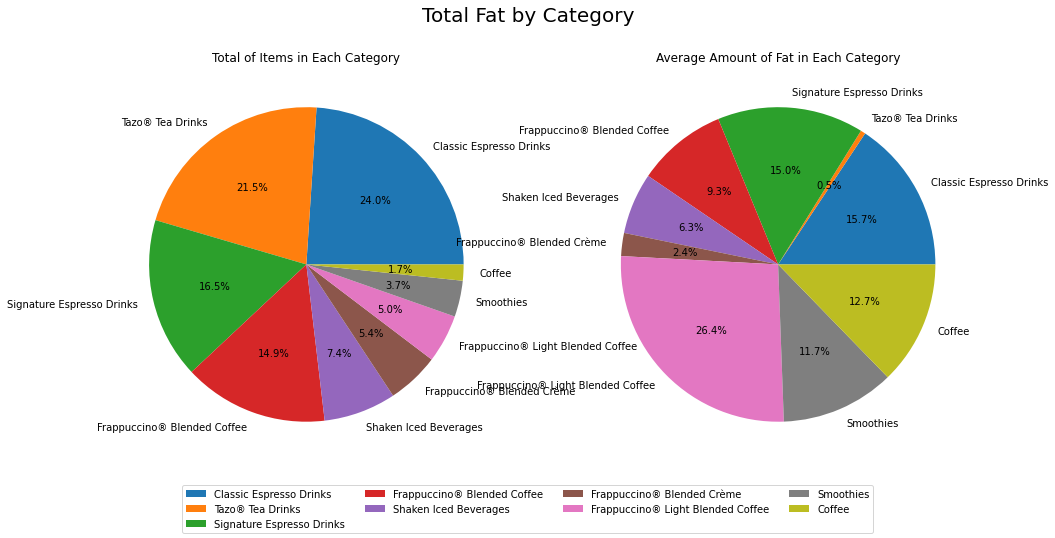

In [18]:
fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(15.5, 7.5)
ax1.set_title("Total of Items in Each Category")
ax1.pie(by_category['Count'],labels =by_category['beverage_category'],autopct = '%1.1f%%')

ax2.set_title("Average Amount of Fat in Each Category")
ax2.pie(by_category['fat_g (Mean)'],labels =by_category['beverage_category'],autopct = '%1.1f%%')

fig.suptitle('Total Fat by Category',fontsize = 20)
fig.legend(by_category['beverage_category'],ncol=4,loc=8)

#From the figure, most item in the menu is Coffee & Tea (36.5%) and most calories came from Chicken & Fish (28.2%). If we see dessert, with only 7 item (2.7%) in the menu (Second least item in the menu), it gets 15.5% calories (Fourt most calories in the menu).

#Let's see how the correlation between nutrients with Heatmap plot:

To understand this relationship, We constructed a pie chart with Total Fat and Drink Category.

According to these two chart, there are 9 types of Starbucks Beverages and their average amount of Total Fat in each type. These are Classic Espresso Drinks, Coffee, Frappuccino Blended Coffee, Frappuccino Blended Creme, Frappuccino Light Blended Coffee, Shaken Iced Beverages, Signature Espresso Drinks, Smoothies, and Tazo Tea Drinks. 

When we look at the distribution of the average amount of Fat at these types, Frappuccino Light Blended Coffee has the most amount of Fat comparing to others. This type contains approximately 26.4% of TotalFat. On the contrary, the least amount of Fat is in Tazo Tea Drinks. The other beverage groups with a high amount of Fat are Classic Espresso Drinks, Signature Espresso Drinks and Coffee, respectively.

**- Difference In Calories between Classic Espresso Drinks and Signature Espresso Drinks?**

Text(0.5, 1.0, 'Classic Espresso Drinks')

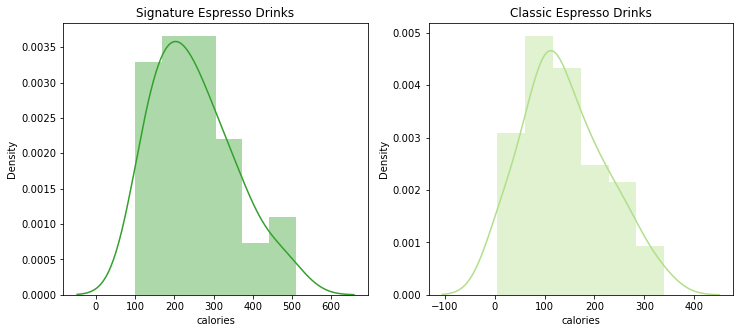

In [19]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.distplot(starbucks_data['calories'].loc[starbucks_data['beverage_category'] == 'Signature Espresso Drinks'].dropna(),
             norm_hist=False, color=sns.color_palette("Paired")[3], ax=ax1)
ax1.set_title('Signature Espresso Drinks')

figure.set_size_inches(12,5)
sns.distplot(starbucks_data['calories'].loc[starbucks_data['beverage_category'] == 'Classic Espresso Drinks'].dropna(),
             norm_hist=False, color=sns.color_palette("Paired")[2], ax=ax2)
ax2.set_title('Classic Espresso Drinks')

To find these differences, we constructed a plot which represents the distribution of both drinks.

According to this graph, Classic Espresso Drinks contains a much higher amount of Calories compared to Signature Espresso Drinks. However, some Signature Espresso Drinks contains more than 400 amount of Calories while none of Classic Espresso Drinks includes more than 400 amount of them. Signature Espresso Drinks is better distributed and it means that this type of beverages is more varied in terms of the number of Calories.

**- Which beverages should not be drunk under specific circumstances such as high calories and total fat?**

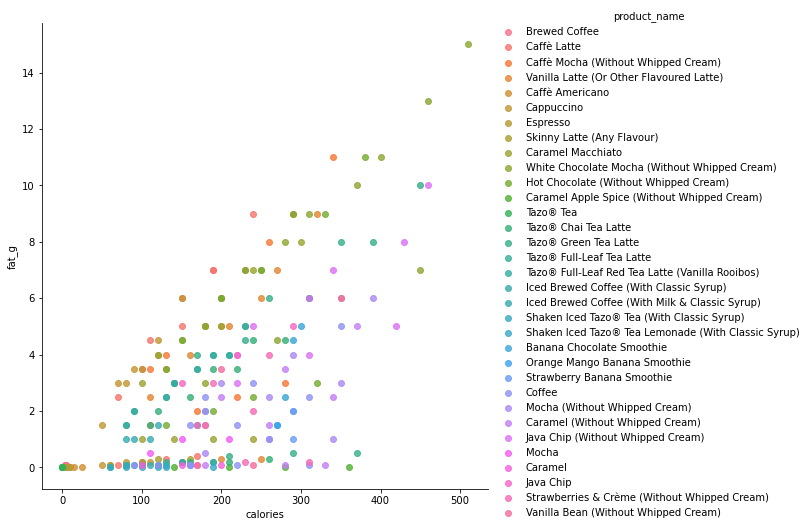

In [20]:
# Visualizing by beverage category
sns.lmplot(data = starbucks_data, x='calories', y='fat_g', fit_reg = False, hue = 'product_name', size = 7, aspect = 1)

To find these beverages, we should decide the circumstances that harmful to health. After deciding process, we think that people should avoid beverages with a high level of Calories and Total Fat. In the light of this information;

This graph represents the distribution of beverages with Calories and Total Fat. According to this, White Chocolate Mocha (Without Whipped Cream) and Caramel Macchiato are beverages not to be preferred. They contain a high amount of Calories and Total Fat. Especially, White Chocolate Mocha has more than 500 Calories that a quarter of the average amount of calories a person needs to take in a day.

## Conclusion 

In our dataset, there are almost 242 types of Starbucks Beverages and their 18 ingredients such as Calories, Trans Fat, Cholesterol, Beverage Preparation Type, Beverage Category and so on. Firstly, I decided the research questions for this dataset. I investigated mostly the relationship between Calories and other ingredients. Also, I looked into Caffeine and Beverage Size relations, Fat and Drinks Category, Nutrients and specific Beverages Category such as Classic Espresso Drink.

The next part is the data description. In this part, we examined the distribution of these ingredients and we decided which one are quantitative or qualitative. Beverage Category, Beverages and Beverage Preparation type are qualitative whereas other ones are quantitative such as Calories, Sugars, Vitamin A, Iron and so on. After that, I looked at the distributions within these variables and drew summary statistics. Then, I checked missing values.

After I had done all the problems, I did the Exploratory Data Analysis (EDA) to test the research questions we had previously determined. As a result of these analyses, I have reached some conclusions. The most important of these are; when the size increase, calories level also increases. People should avoid some Starbucks Drinks to be healthy and these are White Chocolate Mocha (Without Whipped Cream) and Caramel Macchiato. The most amount of Calories levels belongs to beverages preparation with Whole Mik.